In [166]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [248]:
# Data from sql file on kaggle https://www.kaggle.com/gabrio/board-games-dataset

# Pickled for git hub, no longer! We just path to it

conn = sqlite3.connect('../database.sqlite 2')

df_raw = pd.read_sql_query('SELECT * FROM BoardGames', conn)

conn.close()

In [4]:
# df_raw.to_pickle('./raw_df.pkl')

In [5]:
# df_raw = pd.read_pickle('./raw_df.pkl')

In [249]:
pd.set_option('display.max_columns', 999)
df_raw.sort_values(by = ['stats.average'], ascending=False).head()

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
88590,88591,213296,boardgame,"Meu Jardim (My Garden, in Portuguese) is a til...",//cf.geekdo-images.com/images/pic3291166.jpg,4.0,30.0,4.0,1.0,10.0,Meu Jardim,30.0,//cf.geekdo-images.com/images/pic3291166_t.jpg,2016.0,Luiza Sequeira,"Children's Game,Puzzle",None,Rafael Arrivabene,None,None,None,None,"Pattern Recognition,Tile Placement",Ludens Spirit,5.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85161,85162,220661,boardgame,Description from the publisher:&#10;&#10;Genso...,//cf.geekdo-images.com/images/pic3446081.jpg,2.0,30.0,0.0,2.0,30.0,Genso Suikoden Card Stories Trading Card Game,30.0,//cf.geekdo-images.com/images/pic3446081_t.jpg,2001.0,None,"Card Game,Collectible Components,Math,Video Ga...",None,None,None,CCGs (Collectible Card Games),None,None,Hand Management,Konami,4.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90072,90073,219140,boardgameexpansion,"Since 1943 the ISU format, a heavy self-propel...",//cf.geekdo-images.com/images/pic3426277.jpg,2.0,0.0,0.0,2.0,0.0,"Dust Tactics: ISU-203 Heavy Assault Gun – ""Ser...",0.0,//cf.geekdo-images.com/images/pic3426277_t.jpg,0.0,Paolo Parente,"Miniatures,Science Fiction,World War II",None,Paolo Parente,"Dust 1947,Dust Tactics,Dust Tactics: Revised C...",Dust,None,None,"Action Point Allowance System,Dice Rolling,Mod...",Dust Studio,7.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [250]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 81 columns):
row_names                                   90400 non-null object
game.id                                     90400 non-null object
game.type                                   90400 non-null object
details.description                         90400 non-null object
details.image                               83508 non-null object
details.maxplayers                          90397 non-null float64
details.maxplaytime                         90397 non-null float64
details.minage                              90397 non-null float64
details.minplayers                          90397 non-null float64
details.minplaytime                         90397 non-null float64
details.name                                90400 non-null object
details.playingtime                         90397 non-null float64
details.thumbnail                           83508 non-null object
details.yearpublished      

In [251]:
df_raw['attributes.boardgamedesigner'].value_counts()

(Uncredited)                                                            18729
Lloyd Krassner                                                            765
Reiner Knizia                                                             493
Charles Darrow                                                            246
Michael Schacht                                                           205
                                                                        ...  
Patrick Dailey                                                              1
Robert Hain                                                                 1
Matthew Duhan,Brian Lewis                                                   1
Thorleif Bundgaard                                                          1
Nathan Caroland,Mason Crawford,Aaron Darland,Justin Gibbs,Eric Johns        1
Name: attributes.boardgamedesigner, Length: 22699, dtype: int64

In [252]:
non_null_col = []

for col in df_raw.columns:
    if df_raw[col].isnull().sum() < 30000:
        non_null_col.append(col)

In [253]:
df_raw[non_null_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 31 columns):
row_names                        90400 non-null object
game.id                          90400 non-null object
game.type                        90400 non-null object
details.description              90400 non-null object
details.image                    83508 non-null object
details.maxplayers               90397 non-null float64
details.maxplaytime              90397 non-null float64
details.minage                   90397 non-null float64
details.minplayers               90397 non-null float64
details.minplaytime              90397 non-null float64
details.name                     90400 non-null object
details.playingtime              90397 non-null float64
details.thumbnail                83508 non-null object
details.yearpublished            90397 non-null float64
attributes.boardgamecategory     88869 non-null object
attributes.boardgamedesigner     78517 non-null object
attr

In [254]:
df_raw[non_null_col]

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgamecategory,attributes.boardgamedesigner,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.trading,stats.usersrated,stats.wanting,stats.wishing
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,7.66508,4.3477,7.29168,0.0,1763.0,719.0,5251.0,1.59321,170.0,4498.0,505.0,1654.0
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,//cf.geekdo-images.com/images/pic184174_t.jpg,1981.0,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Trick-taking,"E.S. Lowe,Milton Bradley",7.0,6.60815,1.9423,5.87150,0.0,273.0,52.0,1053.0,1.46282,73.0,478.0,67.0,161.0
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998.0,"Abstract Strategy,Medieval",Reiner Knizia,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",6.0,7.44119,2.5085,7.28295,0.0,3281.0,1355.0,11870.0,1.18531,234.0,12019.0,707.0,2601.0
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,//cf.geekdo-images.com/images/pic285299_t.jpg,1992.0,Ancient,Christian Beierer,"Action Point Allowance System,Area Control / A...",KOSMOS,5.0,6.60675,2.6667,5.76636,0.0,111.0,30.0,523.0,1.21028,29.0,314.0,61.0,112.0
4,5,5,boardgame,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,//cf.geekdo-images.com/images/pic342163_t.jpg,1964.0,Economic,Sid Sackson,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",6.0,7.35830,2.5089,7.21895,0.0,5011.0,1515.0,18682.0,1.33020,823.0,15195.0,516.0,2219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90395,90396,220053,boardgame,Soldier Ball is a tabletop skill and strategy ...,//cf.geekdo-images.com/images/pic3436079.jpg,2.0,15.0,4.0,2.0,5.0,Soldier Ball,15.0,//cf.geekdo-images.com/images/pic3436079_t.jpg,2016.0,Action / Dexterity,Nate Dallas,None,(Self-Published),4.0,8.00000,1.0000,0.00000,0.0,3.0,1.0,3.0,0.00000,0.0,3.0,0.0,0.0
90396,90397,220055,boardgame,Description from the designer:&#10;&#10;The ye...,//cf.geekdo-images.com/images/pic3529002.jpg,4.0,45.0,14.0,2.0,30.0,Habeamus,45.0,//cf.geekdo-images.com/images/pic3529002_t.jpg,2017.0,"Bluffing,Card Game,Negotiation,Religious,Renai...","Simon Schliesky,Johannes Spielmann","Auction/Bidding,Hand Management,Trading",(Self-Published),6.0,8.00000,0.0000,0.00000,0.0,1.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0
90397,90398,220068,boardgameexpansion,Cecrops founded Athens and judged a competitio...,//cf.geekdo-images.com/images/pic3503602.jpg,4.0,90.0,14.0,1.0,45.0,Mythic Battles: Pantheon – Cecrops,90.0,//cf.geekdo-images.com/images/pic3503602_t.jpg,2017.0,"Ancient,Card Game,Dice,Expansion for Base-game...",Benoit Vogt,"Area Movement,Campaign / Battle Card Driven,Ca...","Monolith,Mythic Games",7.0,10.00000,0.0000,0.00000,0.0,3.0,0.0,9.0,0.00000,0.0,1.0,0.0,3.0
90398,90399,220069,boardgameexpansion,"The famous Myrmidons are the 

In [255]:
df_raw['attributes.boardgamemechanic'].value_counts()

Roll / Spin and Move                                                                                                    6833
Dice Rolling                                                                                                            3998
Hex-and-Counter                                                                                                         3281
Hand Management                                                                                                         1858
Set Collection                                                                                                          1648
                                                                                                                        ... 
Area Control / Area Influence,Betting/Wagering,Take That,Worker Placement                                                  1
Area Control / Area Influence,Pattern Building,Pattern Recognition                                                         1


In [256]:
mechanics_sub = [f"{x}".split(',') for x in df_raw['attributes.boardgamemechanic']]

In [257]:
mechanics_list = [val for sublist in mechanics_sub for val in sublist]

In [258]:
mechanics_unq_list = list(set(mechanics_list))

In [259]:
mech_dic = sorted([(x,mechanics_list.count(x)) for x in mechanics_unq_list], key=lambda x : x[1], reverse=True);

In [260]:
mech_dic

[('Dice Rolling', 20485),
 ('None', 15237),
 ('Roll / Spin and Move', 13812),
 ('Hand Management', 11068),
 ('Set Collection', 9202),
 ('Variable Player Powers', 7318),
 ('Hex-and-Counter', 6712),
 ('Card Drafting', 6120),
 ('Tile Placement', 4823),
 ('Modular Board', 4628),
 ('Co-operative Play', 4393),
 ('Simulation', 3932),
 ('Memory', 3883),
 ('Point to Point Movement', 3860),
 ('Simultaneous Action Selection', 3590),
 ('Action Point Allowance System', 3499),
 ('Area Control / Area Influence', 3317),
 ('Trading', 3229),
 ('Auction/Bidding', 3228),
 ('Area Movement', 3087),
 ('Grid Movement', 2589),
 ('Pattern Building', 2362),
 ('Partnerships', 2290),
 ('Pattern Recognition', 2218),
 ('Role Playing', 2116),
 ('Deck / Pool Building', 1968),
 ('Pick-up and Deliver', 1774),
 ('Player Elimination', 1718),
 ('Campaign / Battle Card Driven', 1714),
 ('Storytelling', 1601),
 ('Betting/Wagering', 1569),
 ('Press Your Luck', 1567),
 ('Secret Unit Deployment', 1546),
 ('Take That', 1419),
 (

In [261]:
df_raw.loc[df_raw['attributes.boardgamemechanic'].isna()].head(2)

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
20,21,21,boardgame,"A 4X game (eXplore, eXpand, eXploit, eXtermina...",//cf.geekdo-images.com/images/pic1615146.jpg,7.0,0.0,12.0,1.0,0.0,Gateway to the Stars,0.0,//cf.geekdo-images.com/images/pic1615146_t.jpg,1981.0,None,"Civilization,Exploration,Science Fiction",None,Mark A. Snowden,None,4X games,None,None,None,Twentieth Century Renaissance,4.0,5.35714,3.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,5.0,80.0,1.67362,NaN,NaN,4.0,28.0,1.0,11.0,Moderate,Recommended,None,Recommended,NotRecommended,Recommended,Recommended,Recommended,Recommended,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,25,boardgame,"In this fantasy sequel to Twilight Imperium, p...",//cf.geekdo-images.com/images/pic10146.jpg,6.0,200.0,12.0,2.0,200.0,Battlemist,200.0,//cf.geekdo-images.com/images/pic10146_t.jpg,1998.0,"Bill Heagy,Christian T. Petersen","Exploration,Fantasy,Wargame",None,Christian T. Petersen,Battlemist: The Sails of War,"4X games,The Realms of Terrinoth",Runewars,None,None,Fantasy Flight Games,7.0,5.93231,3.2105,5.58913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6472,682.0,5.73762,1715.0,0.0,138.0,19.0,622.0,1.48755,5.58913,5930.0,68.0,308.0,17.0,49.0,None,NotRecommended,None,NotRecommended,Recommended,Recommended,Recommended,NotRecommended,None,None,None,NotRecommended,12,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
# Drop games with no mechanics

df_raw.dropna(subset=['attributes.boardgamemechanic'], inplace=True)

In [263]:
df_raw['game.type'].value_counts()

boardgame             62971
boardgameexpansion    12192
Name: game.type, dtype: int64

In [264]:
# Keep only games that are boardgames in their own right
# Keep only games that have more than 5 votes

df_raw = df_raw.loc[df_raw['game.type'] != 'boardgameexpansion']
df_raw = df_raw.loc[df_raw['stats.usersrated'] > 5]

In [265]:
df_raw

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0,Marcus Gschwendtner,"Economic,Negotiation,Political",None,Karl-Heinz Schmiel,None,"Country: Germany,Valley Games Classic Line",None,None,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,7.66508,4.3477,7.29168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.39570,85.0,NaN,NaN,NaN,NaN,0.0,1763.0,719.0,5251.0,1.59321,7.29168,147.0,170.0,4498.0,505.0,1654.0,No,NotRecommended,None,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,14,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,//cf.geekdo-images.com/images/pic184174_t.jpg,1981.0,Bob Pepper,"Card Game,Fantasy",None,"G. W. ""Jerry"" D'Arcey",None,Animals: Dragons,"Indulgence,Coup d'etat",None,Trick-taking,"E.S. Lowe,Milton Bradley",7.0,6.60815,1.9423,5.87150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.91318,1066.0,NaN,NaN,NaN,NaN,0.0,273.0,52.0,1053.0,1.46282,5.87150,2541.0,73.0,478.0,67.0,161.0,Some,NotRecommended,None,NotRecommended,Recommended,Best,None,None,None,None,None,NotRecommended,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998.0,Franz Vohwinkel,"Abstract Strategy,Medieval",None,Reiner Knizia,None,"Asian Theme,Country: Japan,Knizia tile-laying ...",None,None,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",6.0,7.44119,2.5085,7.28295,NaN

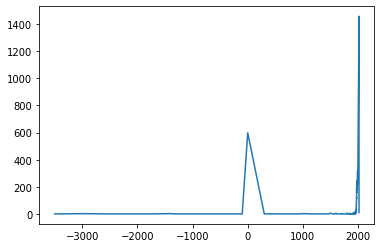

In [266]:
sns.lineplot(data = df_raw['details.yearpublished'].value_counts())

In [267]:
df_raw['details.yearpublished'].value_counts()

2015.0    1456
2016.0    1436
2014.0    1370
2013.0    1177
2012.0    1105
          ... 
1944.0       1
650.0        1
1883.0       1
1430.0       1
1550.0       1
Name: details.yearpublished, Length: 207, dtype: int64

In [268]:
df_raw.loc[df_raw['details.yearpublished'] == 650]

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
16581,16582,18011,boardgame,"Published in GAMES Magazine, January/February ...",//cf.geekdo-images.com/images/pic184346.jpg,4.0,30.0,8.0,2.0,30.0,Chaturanga,30.0,//cf.geekdo-images.com/images/pic184346_t.jpg,650.0,None,Abstract Strategy,None,(Uncredited),None,Chess Games,None,None,"Dice Rolling,Grid Movement,Player Elimination","(Public Domain),ABRA,Aztral Games,Front Porch ...",5.0,6.02625,2.2667,5.53479,5.62354,531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,48.0,15.0,241.0,1.28197,5.53479,8669.0,19.0,80.0,9.0,45.0,No,NotRecommended,None,Recommended,NotRecommended,Best,None,None,None,None,None,NotRecommended,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df_raw.loc[df_raw['game.id'] == '1']

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0,Marcus Gschwendtner,"Economic,Negotiation,Political",None,Karl-Heinz Schmiel,None,"Country: Germany,Valley Games Classic Line",None,None,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,7.66508,4.3477,7.29168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3957,85.0,NaN,NaN,NaN,NaN,0.0,1763.0,719.0,5251.0,1.59321,7.29168,147.0,170.0,4498.0,505.0,1654.0,No,NotRecommended,None,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,14,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df_raw['game.id']

0             1
1             2
2             3
3             4
4             5
          ...  
90239    219513
90277    219666
90327    219774
90334    219807
90341    219832
Name: game.id, Length: 23902, dtype: object

In [181]:
# ids = [x for x in df_raw['game.id']]
# ids = list(set(ids))
# with open('ids.txt', 'w') as f:
#     f.write('\n'.join(ids))

In [341]:
df_scrape = pd.DataFrame(pd.read_csv('games.csv'))

In [342]:
df_scrape = df_scrape.set_index('id').drop(columns=['type'])

In [343]:
# Remove the weird b at the start of all the elements
df_scrape = df_scrape.applymap(lambda x : x[2:-1])

In [273]:
df_raw.rename(columns={'game.id' : 'id'}, inplace=True)

In [274]:
df_raw = df_raw.astype({'id': 'int64'});

In [275]:
df_raw['id'].dtype

dtype('int64')

In [526]:
df_join = df_raw.join(df_scrape, on='id')

In [527]:
df_art = df_join[['id','details.name','details.description','attributes.boardgameartist', 'attributes.boardgamedesigner']]

In [528]:
df_join.drop(columns=['row_names', 'game.type', 'details.image', 'details.thumbnail', 'details.yearpublished','attributes.boardgamecompilation',
                      'attributes.boardgameexpansion', 'attributes.boardgameimplementation', 'attributes.boardgameintegration',
                      'attributes.total', 'stats.average', 'stats.averageweight','stats.bayesaverage', 'stats.median', 'stats.numcomments',
                      'stats.numweights', 'stats.owned', 'stats.stddev','stats.subtype.boardgame.bayesaverage', 'stats.subtype.boardgame.pos',
                      'stats.trading', 'stats.usersrated', 'stats.wanting', 'stats.wishing', 'attributes.t.links.concat.2....', 'name', 'stats.family.amiga.bayesaverage', 'stats.family.amiga.pos',
                      'stats.family.arcade.bayesaverage', 'stats.family.arcade.pos','stats.family.atarist.bayesaverage', 'stats.family.atarist.pos',
                       'stats.family.commodore64.bayesaverage', 'stats.family.commodore64.pos',
                       'stats.subtype.rpgitem.bayesaverage', 'stats.subtype.rpgitem.pos',
                       'stats.subtype.videogame.bayesaverage', 'stats.subtype.videogame.pos',
                      'polls.suggested_numplayers.1', 'polls.suggested_numplayers.10', 'polls.suggested_numplayers.2', 'polls.suggested_numplayers.3',
                      'polls.suggested_numplayers.4','polls.suggested_numplayers.5','polls.suggested_numplayers.6','polls.suggested_numplayers.7',
                      'polls.suggested_numplayers.8', 'polls.suggested_numplayers.9','polls.suggested_numplayers.Over',
                      'stats.family.abstracts.bayesaverage', 'stats.family.abstracts.pos',
                      'stats.family.cgs.bayesaverage', 'stats.family.cgs.pos',
                      'stats.family.childrensgames.bayesaverage',
                      'stats.family.childrensgames.pos',
                      'stats.family.familygames.bayesaverage', 'stats.family.familygames.pos',
                      'stats.family.partygames.bayesaverage', 'stats.family.partygames.pos',
                      'stats.family.strategygames.bayesaverage',
                      'stats.family.strategygames.pos', 'stats.family.thematic.bayesaverage',
                      'stats.family.thematic.pos', 'stats.family.wargames.bayesaverage',
                      'stats.family.wargames.pos', 'details.maxplaytime', 'details.minplaytime','total_owners', 'total_traders',
                      'total_wanters', 'total_wishers', 'total_comments', 'minage', 'minplaytime', 'maxplaytime', 'polls.suggested_playerage',
                      'polls.language_dependence', 'details.playingtime', 'details.minplayers', 'details.minage', 'details.maxplayers', 'attributes.boardgamefamily',
                      'attributes.boardgamecategory', 'attributes.boardgamedesigner', 'attributes.boardgamepublisher', 'attributes.boardgameartist', 'details.description'
                    ], inplace=True)
df_join

,id,details.name,attributes.boardgamemechanic,yearpublished,minplayers,maxplayers,playingtime,users_rated,average_rating,bayes_average_rating,total_weights,average_weight
0,1,Die Macher,"Area Control / Area Influence,Auction/Bidding,...",1986,3,5,240,4900,7.6229,7.1591,737,4.3433
1,2,Dragonmaster,Trick-taking,1981,3,4,30,531,6.60562,5.81019,54,1.963
2,3,Samurai,"Area Control / Area Influence,Hand Management,...",1998,2,4,60,13903,7.44307,7.25092,1415,2.4961
3,4,Tal der Könige,"Action Point Allowance System,Area Control / A...",1992,2,4,60,327,6.60924,5.7078,30,2.6667
4,5,Acquire,"Hand Management,Stock Holding,Tile Placement",1964,2,6,90,17439,7.34797,7.17366,1572,2.5057
...,...,...,...,...,...,...,...,...,...,...,...,...
90239,219513,Bärenpark,Tile Placement,2017,2,4,45,8708,7.35728,7.08617,170,1.6882
90277,219666,Ciudad de Cartón,"Auction/Bidding,Dice Rolling,Trading",2017,2,5,50,35,8.98571,5.51144,2,1
90327,219774,Vikings Gone Wild Ultimate Set,"Deck / Pool Building,Hand Management",2017,2,5,70,112,7.84652,5.65395,2,3
90334,219807,Test of Honour: The Samurai Miniatures Game,"Campaign / Battle Card Driven,Dice Rolling",2017,2,4,60,84,7.85952,5.60058,3,2


In [529]:
df_join = df_join.loc[~df_join['average_weight'].isna()]

In [530]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23881 entries, 0 to 90341
Data columns (total 12 columns):
id                              23881 non-null int64
details.name                    23881 non-null object
attributes.boardgamemechanic    23881 non-null object
yearpublished                   23881 non-null object
minplayers                      23881 non-null object
maxplayers                      23881 non-null object
playingtime                     23881 non-null object
users_rated                     23881 non-null object
average_rating                  23881 non-null object
bayes_average_rating            23881 non-null object
total_weights                   23881 non-null object
average_weight                  23881 non-null object
dtypes: int64(1), object(11)
memory usage: 2.4+ MB


In [531]:
# Finally we have a full dataframe with all the relavent bits
# This will be split into a dataframe for the t-SNE by one-hot'ing the mechanics
df_join

,id,details.name,attributes.boardgamemechanic,yearpublished,minplayers,maxplayers,playingtime,users_rated,average_rating,bayes_average_rating,total_weights,average_weight
0,1,Die Macher,"Area Control / Area Influence,Auction/Bidding,...",1986,3,5,240,4900,7.6229,7.1591,737,4.3433
1,2,Dragonmaster,Trick-taking,1981,3,4,30,531,6.60562,5.81019,54,1.963
2,3,Samurai,"Area Control / Area Influence,Hand Management,...",1998,2,4,60,13903,7.44307,7.25092,1415,2.4961
3,4,Tal der Könige,"Action Point Allowance System,Area Control / A...",1992,2,4,60,327,6.60924,5.7078,30,2.6667
4,5,Acquire,"Hand Management,Stock Holding,Tile Placement",1964,2,6,90,17439,7.34797,7.17366,1572,2.5057
...,...,...,...,...,...,...,...,...,...,...,...,...
90239,219513,Bärenpark,Tile Placement,2017,2,4,45,8708,7.35728,7.08617,170,1.6882
90277,219666,Ciudad de Cartón,"Auction/Bidding,Dice Rolling,Trading",2017,2,5,50,35,8.98571,5.51144,2,1
90327,219774,Vikings Gone Wild Ultimate Set,"Deck / Pool Building,Hand Management",2017,2,5,70,112,7.84652,5.65395,2,3
90334,219807,Test of Honour: The Samurai Miniatures Game,"Campaign / Battle Card Driven,Dice Rolling",2017,2,4,60,84,7.85952,5.60058,3,2


In [532]:
df_tsne = df_join

In [545]:
df_tsne = pd.concat([df_tsne, pd.DataFrame(columns=mechanics_unq_list)], sort=False)

In [547]:
df_tsne.head()

,id,details.name,attributes.boardgamemechanic,yearpublished,minplayers,maxplayers,playingtime,users_rated,average_rating,bayes_average_rating,total_weights,average_weight,Area Enclosure,Singing,Card Drafting,Trading,Simultaneous Action Selection,Hex-and-Counter,Paper-and-Pencil,Time Track,Route/Network Building,Action / Movement Programming,Variable Player Powers,Set Collection,Role Playing,Auction/Bidding,Dice Rolling,Point to Point Movement,Co-operative Play,Worker Placement,Tile Placement,Variable Phase Order,Crayon Rail System,Trick-taking,Line Drawing,Hand Management,Acting,Player Elimination,Secret Unit Deployment,Area Control / Area Influence,Commodity Speculation,Roll / Spin and Move,Action Point Allowance System,Campaign / Battle Card Driven,Area-Impulse,Press Your Luck,Pattern Building,Betting/Wagering,Pattern Recognition,Storytelling,Partnerships,Rock-Paper-Scissors,Chit-Pull System,Deck / Pool Building,Simulation,Take That,Voting,Grid Movement,Area Movement,None,Modular Board,Memory,Pick-up and Deliver,Stock Holding
0,1.0,Die Macher,"Area Control / Area Influence,Auction/Bidding,...",1986,3,5,240,4900,7.6229,7.1591,737,4.3433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Dragonmaster,Trick-taking,1981,3,4,30,531,6.60562,5.81019,54,1.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Samurai,"Area Control / Area Influence,Hand Management,...",1998,2,4,60,13903,7.44307,7.25092,1415,2.4961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Tal der Könige,"Action Point Allowance System,Area Control / A...",1992,2,4,60,327,6.60924,5.7078,30,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Acquire,"Hand Management,Stock Holding,Tile Placement",1964,2,6,90,17439,7.34797,7.17366,1572,2.5057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [568]:
"Dice Rolling" in (df_tsne.loc[0]['attributes.boardgamemechanic'])

True

In [569]:
for index, row in df_tsne.head(1).iterrows():
    for mechanic in mechanics_unq_list:
        if mechanic in df_tsne.loc[index]['attributes.boardgamemechanic']:
            df_tsne.loc[index][mechanic] += 1

/Users/flatiron-school/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [570]:
df_tsne

,id,details.name,attributes.boardgamemechanic,yearpublished,minplayers,maxplayers,playingtime,users_rated,average_rating,bayes_average_rating,total_weights,average_weight,Area Enclosure,Singing,Card Drafting,Trading,Simultaneous Action Selection,Hex-and-Counter,Paper-and-Pencil,Time Track,Route/Network Building,Action / Movement Programming,Variable Player Powers,Set Collection,Role Playing,Auction/Bidding,Dice Rolling,Point to Point Movement,Co-operative Play,Worker Placement,Tile Placement,Variable Phase Order,Crayon Rail System,Trick-taking,Line Drawing,Hand Management,Acting,Player Elimination,Secret Unit Deployment,Area Control / Area Influence,Commodity Speculation,Roll / Spin and Move,Action Point Allowance System,Campaign / Battle Card Driven,Area-Impulse,Press Your Luck,Pattern Building,Betting/Wagering,Pattern Recognition,Storytelling,Partnerships,Rock-Paper-Scissors,Chit-Pull System,Deck / Pool Building,Simulation,Take That,Voting,Grid Movement,Area Movement,None,Modular Board,Memory,Pick-up and Deliver,Stock Holding
0,1.0,Die Macher,"Area Control / Area Influence,Auction/Bidding,...",1986,3,5,240,4900,7.6229,7.1591,737,4.3433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Dragonmaster,Trick-taking,1981,3,4,30,531,6.60562,5.81019,54,1.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Samurai,"Area Control / Area Influence,Hand Management,...",1998,2,4,60,13903,7.44307,7.25092,1415,2.4961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Tal der Könige,"Action Point Allowance System,Area Control / A...",1992,2,4,60,327,6.60924,5.7078,30,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Acquire,"Hand Management,Stock Holding,Tile Placement",1964,2,6,90,17439,7.34797,7.17366,1572,2.5057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90239,219513.0,Bärenpark,Tile Placement,2017,2,4,45,8708,7.35728,7.08617,170,1.6882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90277,219666.0,Ciudad de Cartón,"Auction/Bidding,Dice Rolling,Trading",2017,2,5,50,35,8.98571,5.51144,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90327,219774.0,Vikings Gone Wild Ultimate Set,"Deck / Pool Building,Hand Management",2017,2,5,70,112,7.84652,5.65395,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90334,219807.0,Test of Honour: The Samurai Miniatures Game,"Campaign / Battle Card Driven,Dice Rolling",2017,2,4,60,84,7.85952,5.60058,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,